### Code to estimate quarterly TFP growth for the Philippines
##### Values printed after the last cell at the bottom of the code

In [7]:
import pandas as pd
from IPython.display import display, Markdown
import numpy as np
import matplotlib.pyplot as plt

# Define the file path and sheet name. 
# Make sure that the file is in the same folder as this .ipynb file, otherwise specify path to .xlsx file.
file_path = "public_emdat_custom_request_2025-02-23.xlsx" 
sheet_name = "EM-DAT Data"

# Read the specified sheet into a Pandas DataFrame
df = pd.read_excel(file_path, sheet_name=sheet_name)

columns_to_extract = ["Disaster Type", "Event Name", "ISO", "Magnitude", "Magnitude Scale", "Start Year", "Total Damage, Adjusted ('000 US$)"]  

def assign_storm_category(df):
    '''
    Assign storm categories 1 to 5 to storm based on its magnitude (knots).
    '''

    if df['Magnitude (knots)'] >= 136:
        return 5
    if df['Magnitude (knots)'] >= 113 and df['Magnitude (knots)'] < 136:
        return 4
    if df['Magnitude (knots)'] >= 96 and df['Magnitude (knots)'] <= 112:
        return 3
    if df['Magnitude (knots)'] >= 83 and df['Magnitude (knots)'] <= 95:
        return 2
    if df['Magnitude (knots)'] >= 64 and df['Magnitude (knots)'] <= 82:
        return 1
    if df['Magnitude (knots)'] < 64:
        return 'no hurricane'

#storm category based on Saffir-Simpson hurrican wind scale https://www.nhc.noaa.gov/aboutsshws.php
storm_cat_dict = {
    "Storm Category": [5, 4, 3, 2, 1, 'no hurricane'],
    "Minimum WS (knots)": [137, 113, 96, 83, 64, 0],
    "Maximum WS (knots)": [137, 136, 112, 95, 82, 63]
}

df_storm_cat = pd.DataFrame(storm_cat_dict)

def calculate_TFP_loss(df):
    '''
    TFP loss calculated based on average of min and max wind speed.
    '''

    beta_max = df['Maximum WS (knots)'] * (-0.0046 / 137)
    beta_min = df['Minimum WS (knots)'] * (-0.0046 / 137)

    return 0.5 * (beta_max + beta_min)

df_storm_cat[r'$\beta_{TFP \, loss}$'] = df_storm_cat.apply(calculate_TFP_loss, axis=1)

# Extract the selected columns into a new DataFrame
df_selected = df[columns_to_extract]

# Ensure we are working with a copy to avoid SettingWithCopyWarning
df_selected = df_selected.copy()

df_selected.dropna(subset=["Magnitude"], inplace=True)
df_selected.dropna(subset=["Total Damage, Adjusted ('000 US$)"], inplace=True)
df_selected['Total Damage (US$)'] = df_selected["Total Damage, Adjusted ('000 US$)"] * 1000
df_selected.rename(columns={'Start Year': 'year'}, inplace=True)
df_selected['Magnitude (knots)'] = df_selected['Magnitude'].apply(lambda x: x/1.852)
df_selected['Storm Category'] = df_selected.apply(assign_storm_category, axis=1)
df_selected_phl = df_selected.loc[df_selected['ISO'] == 'PHL']
df_selected_phl_merged = pd.merge(df_selected_phl, df_storm_cat, on='Storm Category', how='left').drop(columns=['Minimum WS (knots)', 'Maximum WS (knots)', "Total Damage, Adjusted ('000 US$)"])
df_selected_phl_merged_grouped = df_selected_phl_merged.groupby('year', as_index=False)[["Total Damage (US$)", r"$\beta_{TFP \, loss}$"]].sum()

display(Markdown(df_selected_phl_merged_grouped.to_markdown()))

|    |   year |   Total Damage (US$) |   $\beta_{TFP \, loss}$ |
|---:|-------:|---------------------:|------------------------:|
|  0 |   1981 |          1.1729e+08  |             -0.00349197 |
|  1 |   1983 |          5.017e+06   |             -0.00245109 |
|  2 |   1984 |          9.18945e+08 |             -0.00878029 |
|  3 |   1985 |          1.76683e+08 |             -0.00418029 |
|  4 |   1986 |          8.5371e+07  |             -0.00418029 |
|  5 |   1987 |          4.14582e+08 |             -0.00836058 |
|  6 |   1988 |          1.00373e+09 |             -0.00716861 |
|  7 |   1989 |          9.8379e+07  |             -0.00893139 |
|  8 |   1990 |          9.06001e+08 |             -0.00418029 |
|  9 |   1991 |          2.01357e+08 |             -0.0046     |
| 10 |   1993 |          5.38797e+08 |             -0.011181   |
| 11 |   1994 |          1.43486e+08 |             -0.00350876 |
| 12 |   1995 |          6.24067e+08 |             -0.00908248 |
| 13 |   1996 |          8.1882e+07  |             -0.00350876 |
| 14 |   1997 |          9.491e+06   |             -0.00349197 |
| 15 |   1998 |          4.40088e+08 |             -0.0122891  |
| 16 |   2000 |          1.45561e+08 |             -0.0143372  |
| 17 |   2001 |          1.67377e+08 |             -0.00768905 |
| 18 |   2002 |          1.1289e+07  |             -0.00597664 |
| 19 |   2003 |          4.7907e+07  |             -0.00594307 |
| 20 |   2004 |          9.7866e+07  |             -0.0171409  |
| 21 |   2005 |          3.12e+06    |             -0.00105766 |
| 22 |   2006 |          2.94443e+08 |             -0.0166036  |
| 23 |   2007 |          8.818e+06   |             -0.00543942 |
| 24 |   2008 |          6.13838e+08 |             -0.0094854  |
| 25 |   2009 |          9.38811e+08 |             -0.010862   |
| 26 |   2010 |          3.97437e+08 |             -0.00705109 |
| 27 |   2011 |          1.7512e+07  |             -0.00543942 |
| 28 |   2012 |          1.2054e+09  |             -0.0100394  |
| 29 |   2013 |          1.30797e+10 |             -0.0046     |
| 30 |   2014 |          1.34773e+09 |             -0.0143204  |
| 31 |   2015 |          4.84465e+08 |             -0.0164526  |

/var/folders/jf/6g1mfg3d7m16wdt3vrsgj2b00000gn/T/ipykernel_17692/2814609961.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_philippines["TFP Pct_Change"] = df_philippines["TFP"].pct_change()


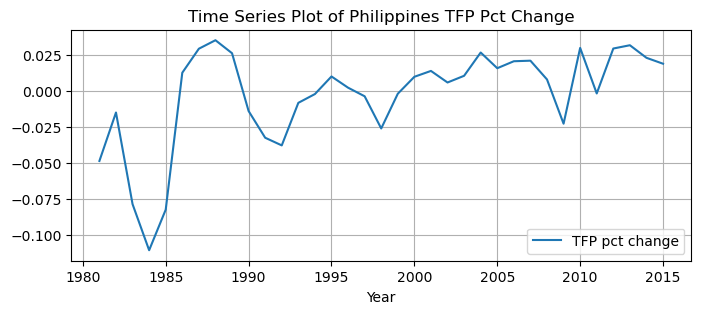

In [ ]:
# Define the file path and sheet name.
# Make sure that the file is in the same folder as this .ipynb file, otherwise specify path to .xlsx file.
file_path = "pwt1001.xlsx" 
sheet_name = "Data"

# Read the specified sheet into a Pandas DataFrame
df = pd.read_excel(file_path, sheet_name=sheet_name)

# List of columns to extract
#rgdpna: real GDP at constant 2017 national prices, rnna: capital stock at constant 2017 national prices; both in Mio. 2017 US$
#rtfpna: TFP at constant national prices (2017=1)
columns_to_extract = ["year", "country", "rgdpna", "rnna", "rtfpna"]  

# Dictionary mapping old column names to new ones
rename_dict = {
    "rgdpna": "realGDP",
    "rnna": "CapitalStock",
    "rtfpna": "TFP"
}

# Extract the selected columns into a new DataFrame
df_selected = df[columns_to_extract]

# Ensure we are working with a copy to avoid SettingWithCopyWarning
df_selected = df_selected.copy()

# Rename the columns
df_selected = df_selected.rename(columns=rename_dict)

#convert "year" column to datetime format, to be able to plot afterwards 
df_selected["year"] = pd.to_datetime(df_selected["year"].astype(str), format='%Y')
df_selected["year"] = df_selected["year"].dt.year.astype(int)
df_selected = df_selected[(df_selected["year"] >= 1980) & (df_selected["year"] < 2016)]
df_selected.set_index("year", inplace=True)

#If the columns contain text (e.g., "NaN", "missing", or other non-numeric values), convert them to numeric. 
#The errors='coerce' argument will replace non-numeric values with NaN instead of failing.
# List of columns to convert
columns_to_convert = ["realGDP", "CapitalStock", "TFP"]

# Convert selected columns to numeric, coercing errors to NaN if necessary
df_selected[columns_to_convert] = df_selected[columns_to_convert].apply(pd.to_numeric, errors="coerce")

#Real GDP & capital stock are reported in 2017 $. Therefore, convert to 2021 $ to make it comparable to EM-DAT data; use World Bank values.
#Source: https://databank.worldbank.org/metadataglossary/world-development-indicators/series/NY.GDP.DEFL.ZS
gdp_deflator_2017 = 96.3942257034852  # 2017 deflator
gdp_deflator_2018 = 100.0  # 2018 is the base year (no change)
gdp_deflator_2021 = 104.695395425257  # 2021 deflator

df_selected['realGDP'] = df_selected['realGDP'] * 1_000_000 * gdp_deflator_2021/gdp_deflator_2017
df_selected['CapitalStock'] = df_selected['CapitalStock'] * 1_000_000 * gdp_deflator_2021/gdp_deflator_2017

df_selected['ln_realGDP'] = df_selected['realGDP'].apply(np.log)
df_selected['ln_CapitalStock'] = df_selected['CapitalStock'].apply(np.log)

df_mexico = df_selected.loc[df_selected["country"] == "Mexico"]
df_philippines = df_selected.loc[df_selected["country"] == "Philippines"]

df_philippines["TFP Pct_Change"] = df_philippines["TFP"].pct_change()

# Plot TFP time evolution of Mexico
plt.figure(figsize=(8, 3))
plt.plot(df_philippines.index, df_philippines['TFP Pct_Change'], linestyle='-', label='TFP pct change')
plt.title(f"Time Series Plot of Philippines TFP Pct Change")
plt.xlabel("Year")
#plt.ylabel("TFP at const. National Prices (2017=1)")
plt.legend()
plt.grid(True)
plt.show()

In [8]:
df_selected_phl_merged_final = pd.merge(df_philippines, df_selected_phl_merged_grouped, on='year', how='left')
df_selected_phl_merged_final["Total Damage (US$)"] = df_selected_phl_merged_final["Total Damage (US$)"].fillna(0)
df_selected_phl_merged_final[r'$\beta_{TFP \, loss}$'] = df_selected_phl_merged_final[r'$\beta_{TFP \, loss}$'].fillna(0)
df_selected_phl_merged_final['d_t_CapitalStock'] = df_selected_phl_merged_final["Total Damage (US$)"] / df_selected_phl_merged_final['CapitalStock']
df_selected_phl_merged_final

def compute_lnTFP_CapitalStock_damage(df_country):

    alpha = 2 / 3

    return 1 / (1-alpha) * (df_country['ln_realGDP'] + alpha * df_country["d_t_CapitalStock"] - alpha * df_country['ln_CapitalStock'])

df_selected_phl_merged_final['lnTFP_estimated_CapitalStock'] = compute_lnTFP_CapitalStock_damage(df_selected_phl_merged_final)

#divide by 4 to adjust to quarterly values
df_selected_phl_merged_final['TFP_estimated_CapitalStock_pct_change'] = df_selected_phl_merged_final['lnTFP_estimated_CapitalStock'].apply(np.exp).pct_change() / 4

display(Markdown(df_selected_phl_merged_final.to_markdown()))

|    |   year | country     |     realGDP |   CapitalStock |      TFP |   ln_realGDP |   ln_CapitalStock |   TFP Pct_Change |   Total Damage (US$) |   $\beta_{TFP \, loss}$ |   d_t_CapitalStock |   lnTFP_estimated_CapitalStock |   TFP_estimated_CapitalStock_pct_change |
|---:|-------:|:------------|------------:|---------------:|---------:|-------------:|------------------:|-----------------:|---------------------:|------------------------:|-------------------:|-------------------------------:|----------------------------------------:|
|  0 |   1980 | Philippines | 2.36647e+11 |    4.96057e+11 | 1.1192   |      26.1898 |           26.93   |     nan          |          0           |              0          |        0           |                        24.7096 |                            nan          |
|  1 |   1981 | Philippines | 2.44748e+11 |    5.41829e+11 | 1.06471  |      26.2235 |           27.0182 |      -0.0486875  |          1.1729e+08  |             -0.00349197 |        0.000216471 |                        24.6345 |                             -0.0180885  |
|  2 |   1982 | Philippines | 2.53606e+11 |    5.88949e+11 | 1.0488   |      26.259  |           27.1016 |      -0.0149474  |          0           |              0          |        0           |                        24.5739 |                             -0.0146884  |
|  3 |   1983 | Philippines | 2.5836e+11  |    6.40183e+11 | 0.966193 |      26.2776 |           27.185  |      -0.0787604  |          5.017e+06   |             -0.00245109 |        7.83682e-06 |                        24.4628 |                             -0.0262871  |
|  4 |   1984 | Philippines | 2.39439e+11 |    6.63582e+11 | 0.859109 |      26.2016 |           27.2209 |      -0.11083    |          9.18945e+08 |             -0.00878029 |        0.00138482  |                        24.1656 |                             -0.064279   |
|  5 |   1985 | Philippines | 2.21944e+11 |    6.65173e+11 | 0.788154 |      26.1257 |           27.2233 |      -0.0825913  |          1.76683e+08 |             -0.00418029 |        0.00026562  |                        23.931  |                             -0.0522872  |
|  6 |   1986 | Philippines | 2.29527e+11 |    6.68445e+11 | 0.798202 |      26.1593 |           27.2282 |       0.0127488  |          8.5371e+07  |             -0.00418029 |        0.000127716 |                        24.0217 |                              0.0237352  |
|  7 |   1987 | Philippines | 2.39424e+11 |    6.76146e+11 | 0.821719 |      26.2015 |           27.2397 |       0.0294615  |          4.14582e+08 |             -0.00836058 |        0.000613155 |                        24.1264 |                              0.0275946  |
|  8 |   1988 | Philippines | 2.55591e+11 |    6.92316e+11 | 0.850789 |      26.2668 |           27.2633 |       0.0353779  |          1.00373e+09 |             -0.00716861 |        0.00144982  |                        24.2768 |                              0.0405849  |
|  9 |   1989 | Philippines | 2.71451e+11 |    7.20092e+11 | 0.873192 |      26.327  |           27.3026 |       0.0263318  |          9.8379e+07  |             -0.00893139 |        0.00013662  |                        24.3761 |                              0.026103   |
| 10 |   1990 | Philippines | 2.79695e+11 |    7.55906e+11 | 0.861033 |      26.357  |           27.3512 |      -0.0139251  |          9.06001e+08 |             -0.00418029 |        0.00119856  |                        24.3709 |                             -0.0012966  |
| 11 |   1991 | Philippines | 2.78078e+11 |    7.79305e+11 | 0.833037 |      26.3512 |           27.3817 |      -0.0325143  |          2.01357e+08 |             -0.0046     |        0.00025838  |                        24.2907 |                             -0.0192789  |
| 12 |   1992 | Philippines | 2.79016e+11 |    8.05358e+11 | 0.801505 |      26.3545 |           27.4146 |      -0.037852   |          0           |              0          |        0           |                        24.2345 |                             -0.0136564  |
| 13 |   1993 | Philippines | 2.84921e+11 |    8.36507e+11 | 0.794919 |      26.3755 |           27.4525 |      -0.00821669 |          5.38797e+08 |             -0.011181   |        0.000644104 |                        24.2227 |                             -0.00292775 |
| 14 |   1994 | Philippines | 2.97422e+11 |    8.70841e+11 | 0.793245 |      26.4184 |           27.4927 |      -0.00210625 |          1.43486e+08 |             -0.00350876 |        0.000164767 |                        24.2701 |                              0.012139   |
| 15 |   1995 | Philippines | 3.11338e+11 |    9.0759e+11  | 0.801291 |      26.4641 |           27.5341 |       0.0101439  |          6.24067e+08 |             -0.00908248 |        0.000687609 |                        24.3257 |                              0.0142821  |
| 16 |   1996 | Philippines | 3.29538e+11 |    9.51725e+11 | 0.803162 |      26.521  |           27.5815 |       0.00233474 |          8.1882e+07  |             -0.00350876 |        8.60354e-05 |                        24.4    |                              0.0192747  |
| 17 |   1997 | Philippines | 3.46626e+11 |    1.00417e+12 | 0.800233 |      26.5715 |           27.6352 |      -0.00364725 |          9.491e+06   |             -0.00349197 |        9.45155e-06 |                        24.4442 |                              0.011303   |
| 18 |   1998 | Philippines | 3.44627e+11 |    1.04153e+12 | 0.779377 |      26.5657 |           27.6717 |      -0.0260629  |          4.40088e+08 |             -0.0122891  |        0.00042254  |                        24.3546 |                             -0.0214208  |
| 19 |   1999 | Philippines | 3.55248e+11 |    1.07197e+12 | 0.777912 |      26.5961 |           27.7005 |      -0.0018792  |          0           |              0          |        0           |                        24.3872 |                              0.00828749 |
| 20 |   2000 | Philippines | 3.70919e+11 |    1.11192e+12 | 0.785632 |      26.6392 |           27.7371 |       0.00992353 |          1.45561e+08 |             -0.0143372  |        0.00013091  |                        24.4438 |                              0.0145514  |
| 21 |   2001 | Philippines | 3.81653e+11 |    1.14694e+12 | 0.796634 |      26.6678 |           27.7681 |       0.0140042  |          1.67377e+08 |             -0.00768905 |        0.000145934 |                        24.4674 |                              0.00597145 |
| 22 |   2002 | Philippines | 3.95568e+11 |    1.18322e+12 | 0.801372 |      26.7036 |           27.7993 |       0.00594764 |          1.1289e+07  |             -0.00597664 |        9.54094e-06 |                        24.5123 |                              0.011473   |
| 23 |   2003 | Philippines | 4.15229e+11 |    1.22859e+12 | 0.809878 |      26.7521 |           27.8369 |       0.0106144  |          4.7907e+07  |             -0.00594307 |        3.89935e-05 |                        24.5826 |                              0.0182145  |
| 24 |   2004 | Philippines | 4.4304e+11  |    1.27486e+12 | 0.831592 |      26.8169 |           27.8739 |       0.0268113  |          9.7866e+07  |             -0.0171409  |        7.67661e-05 |                        24.7032 |                              0.0320491  |
| 25 |   2005 | Philippines | 4.64207e+11 |    1.32151e+12 | 0.844807 |      26.8636 |           27.9098 |       0.0158919  |          3.12e+06    |             -0.00105766 |        2.36093e-06 |                        24.7712 |                              0.0175871  |
| 26 |   2006 | Philippines | 4.88545e+11 |    1.37206e+12 | 0.862333 |      26.9147 |           27.9473 |       0.020745   |          2.94443e+08 |             -0.0166036  |        0.000214599 |                        24.8498 |                              0.0204564  |
| 27 |   2007 | Philippines | 5.2087e+11  |    1.42671e+12 | 0.880554 |      26.9788 |           27.9864 |       0.0211296  |          8.818e+06   |             -0.00543942 |        6.18065e-06 |                        24.9635 |                              0.0300978  |
| 28 |   2008 | Philippines | 5.42501e+11 |    1.48297e+12 | 0.88766  |      27.0195 |           28.0251 |       0.00807047 |          6.13838e+08 |             -0.0094854  |        0.000413926 |                        25.0091 |                              0.011647   |
| 29 |   2009 | Philippines | 5.4873e+11  |    1.53555e+12 | 0.867479 |      27.0309 |           28.0599 |      -0.0227351  |          9.38811e+08 |             -0.010862   |        0.000611385 |                        24.974  |                             -0.00860796 |
| 30 |   2010 | Philippines | 5.90611e+11 |    1.60973e+12 | 0.893512 |      27.1044 |           28.1071 |       0.0300101  |          3.97437e+08 |             -0.00705109 |        0.000246897 |                        25.0996 |                              0.0334469  |
| 31 |   2011 | Philippines | 6.12226e+11 |    1.67654e+12 | 0.892003 |      27.1404 |           28.1478 |      -0.00168892 |          1.7512e+07  |             -0.00543942 |        1.04453e-05 |                        25.1256 |                              0.00659309 |
| 32 |   2012 | Philippines | 6.53146e+11 |    1.75505e+12 | 0.918401 |      27.2051 |           28.1935 |       0.0295935  |          1.2054e+09  |             -0.0100394  |        0.000686818 |                        25.2295 |                              0.0273784  |
| 33 |   2013 | Philippines | 6.99284e+11 |    1.84833e+12 | 0.947687 |      27.2733 |           28.2453 |       0.0318882  |          1.30797e+10 |             -0.0046     |        0.00707652  |                        25.3435 |                              0.0301815  |
| 34 |   2014 | Philippines | 7.42257e+11 |    1.95009e+12 | 0.969609 |      27.333  |           28.2989 |       0.0231321  |          1.34773e+09 |             -0.0143204  |        0.000691109 |                        25.4025 |                              0.015182   |
| 35 |   2015 | Philippines | 7.87287e+11 |    2.07727e+12 | 0.988045 |      27.3919 |           28.3621 |       0.0190144  |          4.84465e+08 |             -0.0164526  |        0.000233222 |                        25.4519 |                              0.0126643  |

In [9]:
stats_TFP_from_CapitalStock_damage = df_selected_phl_merged_final['TFP_estimated_CapitalStock_pct_change'].describe()

mean_TFP_from_CapitalStock_damage = stats_TFP_from_CapitalStock_damage['mean']
std_dev_TFP_from_CapitalStock_damage = stats_TFP_from_CapitalStock_damage['std']

print(f"Quarterly mean of TFP growth from capital stock damage: {mean_TFP_from_CapitalStock_damage} & respective std dev: {std_dev_TFP_from_CapitalStock_damage}")

Quarterly mean of TFP growth from capital stock damage: 0.006513698132470293 & respective std dev: 0.02364533840128805
